# **Proyek Kedua Kelas Machine Learning Terapan: Sistem Rekomendasi**

## Import Library

Pada tahap awal, dilakukan import beberapa library yang digunakan dalam proses pengolahan data dan analisis, yaitu:

* os -> Digunakan untuk mengelola direktori dan path file pada sistem.

* pandas -> Digunakan untuk membaca, membersihkan, dan memanipulasi data dalam bentuk DataFrame.

* kagglehub -> Digunakan untuk mengunduh dataset langsung dari Kaggle ke lingkungan Google Colab.

* matplotlib.pyplot -> Digunakan untuk membuat visualisasi data seperti grafik batang.

* TfidfVectorizer (scikit-learn) -> Digunakan untuk mengubah data teks (genre atau deskripsi buku) menjadi representasi numerik menggunakan metode TF-IDF.

* cosine_similarity (scikit-learn) -> Digunakan untuk menghitung tingkat kemiripan antar buku berdasarkan hasil vektor TF-IDF.

In [1]:
import os
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Dataset

**Dataset yang digunakan:**
Best Books 10K Multi-Genre Data dari Kaggle.

**Sumber:**
Ishika Johari. Best Books 10K Multi-Genre Data. Kaggle.

**Deskripsi Dataset:**
Data dikumpulkan dari platform Goodreads berdasarkan daftar “Books That Everyone Should Read At Least Once”.

**Diakses dari:**
https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data/data

In [2]:
path = kagglehub.dataset_download("ishikajohari/best-books-10k-multi-genre-data")

print("Dataset path:", path)

Using Colab cache for faster access to the 'best-books-10k-multi-genre-data' dataset.
Dataset path: /kaggle/input/best-books-10k-multi-genre-data


## Data Overview

In [3]:
os.listdir(path)

['goodreads_data.csv']

In [4]:
df = pd.read_csv(f"{path}/goodreads_data.csv")

In [5]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


**df.head()** menampilkan beberapa baris pertama dari dataset (default 5 baris). Fungsi ini berguna untuk melihat contoh data, memeriksa format setiap kolom, dan memahami struktur dataset sebelum melakukan analisis atau pembersihan lebih lanjut.

In [6]:
df.shape

(10000, 8)

**df.shape** digunakan untuk menampilkan ukuran dataset dalam bentuk (jumlah baris, jumlah kolom). Fungsi ini membantu mengetahui dimensi data secara cepat untuk memastikan jumlah observasi dan fitur yang digunakan dalam analisis.

Hasil df.shape = (10000, 8) menunjukkan bahwa dataset memiliki 10.000 baris data dan 8 kolom (fitur). Artinya, terdapat 10.000 entri buku dengan 8 atribut yang digunakan dalam analisis.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


**df.info()** menampilkan ringkasan struktur dataset, meliputi jumlah baris dan kolom, nama setiap fitur, jumlah data yang tidak kosong (non-null), serta tipe data dari masing-masing fitur. Informasi ini digunakan untuk memahami kondisi awal data sebelum dilakukan proses pembersihan dan analisis lebih lanjut.

Berdasarkan hasil tersebut, terlihat bahwa fitur Description memiliki missing value karena jumlah data tidak mencapai 10.000 seperti fitur lainnya. Informasi ini penting sebagai dasar dalam menentukan metode penanganan data yang sesuai pada tahap data preprocessing.

## Data Preparation

In [8]:
df_clean = df.copy()

In [9]:
df_clean.isnull().sum()

,0
Unnamed: 0,0
Book,0
Author,0
Description,77
Genres,0
Avg_Rating,0
Num_Ratings,0
URL,0


**isnull().sum()** digunakan untuk mengecek jumlah nilai kosong (missing value) di setiap kolom pada DataFrame df_clean.

Berdasarkan hasilnya, kolom Description memiliki 77 missing value dari total 10.000 baris, jumlah yang relatif kecil dibandingkan keseluruhan dataset. Oleh karena itu, nilai yang hilang pada kolom ini dapat dihapus tanpa memengaruhi analisis secara signifikan.

In [10]:
df_clean = df_clean.dropna(subset=['Description'])

In [11]:
df_clean.isnull().sum()

,0
Unnamed: 0,0
Book,0
Author,0
Description,0
Genres,0
Avg_Rating,0
Num_Ratings,0
URL,0


In [12]:
df_clean.shape

(9923, 8)

Setelah menghapus 77 baris yang memiliki missing value pada kolom Description, sekarang dataset sudah bersih dan siap digunakan. Jumlah total data berkurang dari **10.000** menjadi **9.923** baris, sehingga semua entri pada kolom Description kini sudah tidak ada lagi null.

In [13]:
df_clean.duplicated().sum()

np.int64(0)

**duplicated().sum()** digunakan untuk memeriksa apakah ada baris yang duplikat dalam DataFrame df_clean.

Berdasarkan hasilnya, tidak ditemukan baris duplikat, sehingga setiap entri di dataset unik dan siap untuk analisis lebih lanjut tanpa perlu pembersihan tambahan terkait duplikasi.

In [14]:
df_clean['Num_Ratings'] = df_clean['Num_Ratings'].str.replace(',', '')
df_clean['Num_Ratings'] = df_clean['Num_Ratings'].astype(int)

Kolom **Num_Ratings** awalnya berisi teks (string) dengan tanda koma sebagai pemisah ribuan, misalnya "9,278,135". Karena kolom ini menunjukkan jumlah pengguna yang memberikan rating (bukan review), tanda koma dihapus agar nilainya dapat dikonversi menjadi angka dan siap untuk analisis numerik.

In [15]:
df_clean = df_clean.drop(columns=['Unnamed: 0'])
df_clean = df_clean.drop(columns=['URL'])

Kolom Unnamed: 0 dan URL dihapus karena kurang relevan untuk analisis lanjutan.

* **Unnamed: 0** merupakan kolom indeks tambahan yang tidak memuat informasi baru.

* **URL** hanya berisi tautan ke halaman Goodreads, sehingga tidak digunakan dalam perhitungan atau visualisasi data.

Dengan menghapus kedua kolom ini, dataset menjadi lebih bersih dan fokus pada fitur yang penting.

## Univariate Exploratory Data Analysis

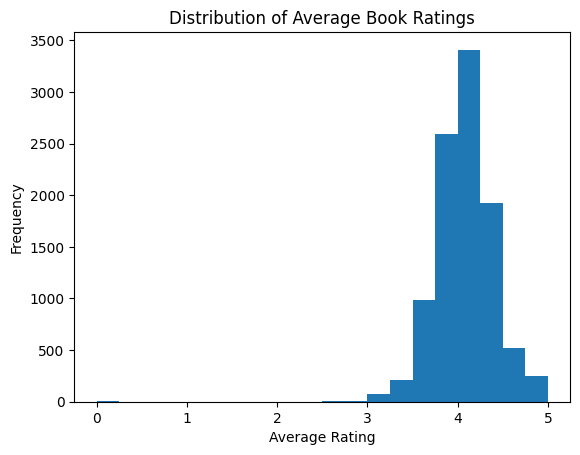

In [16]:
# 1. Distribusi Rata-rata Rating Buku
plt.figure()
plt.hist(df['Avg_Rating'], bins=20)
plt.title('Distribution of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Visualisasi ini menggunakan histogram untuk menampilkan distribusi rata-rata rating buku (Avg_Rating). Setiap batang mewakili jumlah buku (frequency) yang memiliki rentang nilai rating tertentu.

Dari hasil histogram, terlihat bahwa rating yang paling sering muncul adalah sekitar 4, menunjukkan bahwa sebagian besar buku dalam dataset mendapatkan penilaian yang cukup tinggi dari pengguna.

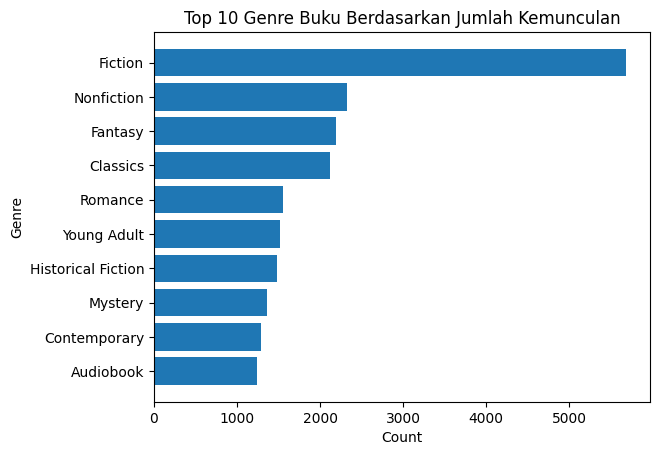

In [17]:
# 2. Top 10 Genre Buku Berdasarkan Jumlah Kemunculan
genre_df = (
    df_clean['Genres']
    .str.strip('[]')
    .str.replace("'", "", regex=False)
    .str.split(', ')
    .explode()
    .value_counts()
    .reset_index())

genre_df.columns = ['Genre', 'Count']

# Urutkan dari yang paling banyak
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Visualisasi Top 10 Genre
plt.figure()
plt.barh(genre_df['Genre'].head(10), genre_df['Count'].head(10))
plt.gca().invert_yaxis()  # biar yang terbesar di atas
plt.title('Top 10 Genre Buku Berdasarkan Jumlah Kemunculan')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Visualisasi ini menampilkan Top 10 genre buku berdasarkan jumlah kemunculannya di dataset.

Pertama, kolom Genres dibersihkan dari tanda kurung dan tanda kutip, kemudian setiap genre dipisah dan dihitung frekuensinya. Setelah itu, 10 genre dengan jumlah terbanyak divisualisasikan menggunakan horizontal bar chart.

Dari hasilnya, terlihat bahwa genre paling dominan adalah Fiction, diikuti oleh Non-Fiction, Fantasy, Classics, dan Romance, menunjukkan genre-genre ini paling banyak terdapat di koleksi buku dalam dataset.

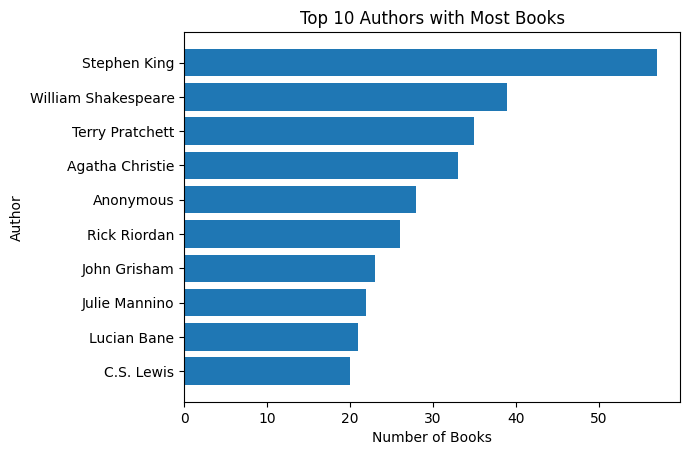

In [18]:
# 3. Top 10 Author dengan Buku terbanyak
author_df = (
    df_clean['Author']
    .value_counts()
    .reset_index())

author_df.columns = ['Author', 'Count']

# Visualisasi
plt.figure()
plt.barh(author_df['Author'].head(10), author_df['Count'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

Visualisasi ini menampilkan Top 10 penulis yang memiliki jumlah buku terbanyak dalam dataset.

Kolom Author dihitung frekuensinya untuk mengetahui penulis mana yang paling produktif. Hasilnya kemudian divisualisasikan menggunakan horizontal bar chart, dengan penulis yang memiliki buku terbanyak di atas.

Dari visualisasi, terlihat bahwa Stephen King menempati posisi teratas, diikuti oleh William Shakespeare dan Terry Pratchett, menunjukkan bahwa ketiga penulis ini memiliki jumlah karya terbanyak dalam dataset.

## Model Development: Content-Based Filtering

Pada tahap pengembangan model, metode **Content-Based Filtering** akan digunakan untuk merekomendasikan buku. Kali ini, rekomendasi dibuat hanya berdasarkan genre setiap buku.

**Langkah utamanya:**

* Representasi Genre dengan TF-IDF

  Setiap genre buku diubah menjadi vektor numerik menggunakan TF-IDF, sehingga genre yang unik lebih menonjol dibandingkan genre yang umum.

* Mengukur Kemiripan dengan Cosine Similarity

  Dengan vektor TF-IDF genre, cosine similarity digunakan untuk mengukur seberapa mirip genre satu buku dengan buku lainnya. Nilai cosine similarity yang tinggi menunjukkan buku-buku tersebut memiliki genre yang mirip.

Dengan pendekatan ini, model dapat merekomendasikan buku yang genre-nya serupa dengan buku yang diminati pengguna, tanpa memerlukan data rating atau interaksi pengguna.

### 1. TF-IDF

In [19]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada Genres
tf.fit(df_clean['Genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['12th', '15th', '16th', '17th', '18th', '19th', '20th', '21st',
       'about', 'abuse', 'academia', 'academic', 'acceptance', 'action',
       'activism', 'adhd', 'adoption', 'adult', 'adventure', 'africa',
       'african', 'age', 'agriculture', 'alchemy', 'algeria', 'aliens',
       'alternate', 'amazon', 'america', 'american', 'americana',
       'americans', 'amish', 'anarchism', 'ancient', 'and', 'angels',
       'animal', 'animals', 'anthologies', 'anthropology', 'anti',
       'apocalyptic', 'archaeology', 'architecture', 'art', 'arthurian',
       'artificial', 'arts', 'asexual', 'asia', 'asian', 'astrology',
       'astronomy', 'atheism', 'audiobook', 'australia', 'authors',
       'autistic', 'autobiography', 'aviation', 'awards', 'bande',
       'banned', 'baseball', 'basketball', 'batman', 'bdsm', 'beast',
       'beauty', 'biblical', 'biography', 'biology', 'birds', 'bizarro',
       'boarding', 'book', 'books', 'botswana', 'brain', 'brazil',
       'british', 'bud

Langkah ini digunakan untuk mengubah genre buku menjadi representasi numerik agar dapat dianalisis secara matematis:

* TF-IDF Genre: Dibuat vektor TF-IDF dari setiap genre, sehingga genre yang unik (jarang muncul, misal cyberpunk) lebih menonjol dibanding genre yang umum (sering muncul, misal Fiction).

* Perhitungan IDF: Sistem menghitung Inverse Document Frequency (IDF) untuk menilai seberapa penting atau jarangnya sebuah genre di antara semua buku.

* Daftar Fitur Genre: Dibuat daftar semua fitur genre yang akan digunakan sebagai referensi untuk membandingkan kemiripan antar buku.

* Representasi Buku: Setiap buku direpresentasikan sebagai vektor berbasis genre, sehingga siap dihitung kemiripannya menggunakan cosine similarity.

Dengan metode ini, sistem rekomendasi dapat memberikan saran buku yang genre-nya mirip dengan buku yang diminati pengguna.

In [20]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_clean['Genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9923, 583)

Pada langkah ini, setiap genre buku diubah menjadi vektor numerik TF-IDF dan disusun dalam bentuk matrix:

1. fit_transform digunakan untuk sekaligus menghitung bobot TF-IDF dan mengubah data genre menjadi matrix numerik.

2. Hasil matrix memiliki ukuran (9923, 583), artinya ada 9.923 buku (baris) dan 583 fitur genre unik (kolom).

In [21]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Langkah ini digunakan untuk mengubah vektor TF-IDF yang awalnya berbentuk sparse matrix menjadi matrix padat (dense matrix). Sparse matrix hanya menyimpan nilai yang tidak nol untuk efisiensi memori, sedangkan dense matrix menyimpan semua nilai termasuk nol. Dengan bentuk dense matrix, data menjadi lebih mudah dilihat dan dianalisis secara langsung, misalnya saat ingin menampilkan atau memvisualisasikan nilai TF-IDF setiap buku dan genre.

In [22]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genre
# Baris diisi dengan nama buku

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df_clean.Book
).sample(22, axis=1).sample(10, axis=0)

,adventure,15th,drawing,food,unfinished,adhd,cooking,birds,european,environment,...,south,comics,archaeology,popular,christian,states,how,tasmania,edwardian,urbanism
Book,,,,,,,,,,,,,,,,,,,,,
Nana,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nineteen Minutes,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Bud, Not Buddy",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Crossroads (Crossroads Academy, #1)",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Mr. Mercedes (Bill Hodges Trilogy, #1)",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Treasured Amish and Mennonite Recipes: 627 Delicious, Down-to-Earth Recipes from Authentic Country Kitchens",0.000000,0.0,0.0,0.0,0.0,0.0,0.672137,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Furies of Calderon (Codex Alera, #1)",0.255602,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Touch: A Supernatural Story (The Touch, #1)",0.323511,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leon the Lion,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Langkah ini digunakan untuk menampilkan TF-IDF matrix dalam bentuk dataframe agar lebih mudah dipahami. Kolom mewakili jenis genre, sedangkan baris mewakili nama buku. Dengan dataframe ini, kita bisa melihat bobot TF-IDF setiap genre untuk masing-masing buku.

### 2. Cosine Similarity

In [23]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.27102017, 0.67840391, ..., 0.04279165, 0.06627576,
        0.        ],
       [0.27102017, 1.        , 0.13170998, ..., 0.02063002, 0.06390359,
        0.        ],
       [0.67840391, 0.13170998, 1.        , ..., 0.04786189, 0.19259328,
        0.        ],
       ...,
       [0.04279165, 0.02063002, 0.04786189, ..., 1.        , 0.        ,
        0.        ],
       [0.06627576, 0.06390359, 0.19259328, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Langkah ini digunakan untuk menghitung kemiripan antar buku berdasarkan vektor TF-IDF genre menggunakan cosine similarity. Cosine similarity memberi nilai antara 0 sampai 1 yang menunjukkan seberapa mirip dua buku; semakin mendekati 1, artinya buku-buku tersebut memiliki genre yang lebih mirip. Hasilnya berupa matrix kemiripan, di mana setiap baris dan kolom mewakili buku, dan nilainya menunjukkan tingkat kemiripan antar buku.

In [24]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_clean['Book'], columns=df_clean['Book'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9923, 9923)


Book,Persuasion,Lincoln's Dreams,"The Threat Below (Brathius History, #1)",The Little Friend,Cutter
Book,,,,,
"The Case-Book of Sherlock Holmes (Sherlock Holmes, #9)",0.235292,0.066837,0.039278,0.295097,0.0
"Casino Royale (James Bond, #1)",0.138415,0.072883,0.161408,0.443782,0.0
Teaching a Stone to Talk: Expeditions and Encounters,0.000000,0.000000,0.000000,0.000000,0.0
Cracked: Why Psychiatry is Doing More Harm Than Good,0.000000,0.079714,0.046846,0.000000,0.0
"The Story of Doctor Dolittle (Doctor Dolittle, #1)",0.145316,0.178060,0.369171,0.058856,0.0
"Ransom (Highlands' Lairds, #2)",0.608028,0.347006,0.057620,0.075418,0.0
"Blood & Spirits (The Coming Storm, #1)",0.000000,0.133887,0.078683,0.000000,0.0
Seveneves,0.204138,0.481344,0.680304,0.117699,0.0
"Kiss of Midnight (Midnight Breed, #1)",0.142060,0.136899,0.120939,0.000000,0.0


Langkah ini digunakan untuk mengubah matrix cosine similarity menjadi dataframe yang lebih mudah dibaca. Baik baris maupun kolom mewakili nama buku, sehingga setiap sel menunjukkan tingkat kemiripan genre antara dua buku.

Hasil dataframe ini memiliki ukuran (9923, 9923), sesuai dengan jumlah buku dalam dataset. Nilai yang mendekati 1 menunjukkan buku-buku tersebut memiliki genre yang sangat mirip, sedangkan nilai yang mendekati 0 menunjukkan buku-buku yang berbeda genre.

In [25]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=df_clean[['Book', 'Genres']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
      range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Fungsi ini digunakan untuk memberikan rekomendasi buku yang mirip berdasarkan genre dari buku yang dipilih pengguna.

**Cara kerjanya:**

* Fungsi menerima nama buku yang ingin dicari rekomendasinya, matrix kemiripan antar buku (cosine_sim_df), daftar buku dan genre, serta jumlah rekomendasi k.

* Sistem mencari buku dengan nilai cosine similarity terbesar dibanding buku yang dipilih, artinya buku-buku tersebut memiliki genre yang paling mirip.

* Buku yang sama dengan input akan dihapus dari daftar rekomendasi agar tidak muncul sebagai rekomendasi untuk dirinya sendiri.

In [26]:
df_clean[df_clean.Book.eq('Pride and Prejudice')]

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155


### 3. Books Recommendation

In [27]:
book_recommendations('Pride and Prejudice')

,Book,Genres
0,Emma,"['Classics', 'Fiction', 'Romance', 'Historical..."
1,Persuasion,"['Classics', 'Fiction', 'Romance', 'Historical..."
2,Sense and Sensibility,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,"The Duke and I (Bridgertons, #1)","['Romance', 'Historical Romance', 'Historical ..."
4,Gone with the Wind,"['Classics', 'Historical Fiction', 'Fiction', ..."


Fungsi diatas digunakan untuk menampilkan rekomendasi buku yang mirip dengan Pride and Prejudice berdasarkan genre. Hasilnya memperlihatkan daftar buku yang memiliki genre paling mirip, beserta genre masing-masing.

Dari contoh hasilnya, buku-buku seperti Emma, Persuasion, dan Sense and Sensibility muncul karena juga termasuk genre Classics, Fiction, Romance, dan Historical, sehingga sangat relevan sebagai rekomendasi untuk pembaca Pride and Prejudice.

## Evaluation

In [28]:
def is_relevant(book_a, book_b, df):
    genre_a = set(df[df['Book'] == book_a]['Genres'].values[0].split(', '))
    genre_b = set(df[df['Book'] == book_b]['Genres'].values[0].split(', '))
    return len(genre_a & genre_b) > 0

Fungsi **is_relevant()** digunakan untuk menentukan apakah dua buku dianggap relevan. Dua buku dinyatakan relevan apabila memiliki minimal satu genre yang sama.

Prosesnya dilakukan dengan memisahkan genre masing-masing buku menjadi himpunan (set), kemudian menghitung irisan genre di antara keduanya. Jika terdapat irisan, maka fungsi akan mengembalikan nilai True, yang menandakan kedua buku memiliki kesamaan genre dan dianggap relevan.

In [29]:
def get_top_k_books(book_name, similarity_df, k=10):
    scores = similarity_df[book_name].sort_values(ascending=False)
    scores = scores.drop(book_name)
    return scores.head(k).index.tolist()

Fungsi ini digunakan untuk mengambil sejumlah K buku yang paling mirip dengan buku acuan berdasarkan nilai cosine similarity. Buku acuan dikeluarkan dari daftar, lalu dipilih K buku dengan tingkat kemiripan tertinggi sebagai hasil rekomendasi.

In [30]:
def evaluate_recommendation(df, similarity_df, k=10, sample_size=50):
    TP, FP, FN = 0, 0, 0

    # Sampling supaya evaluasi ringan & realistis
    sample_books = df['Book'].sample(sample_size, random_state=42)

    for book in sample_books:
        recommended_books = get_top_k_books(book, similarity_df, k)

        # Hitung TP dan FP
        for rec in recommended_books:
            if is_relevant(book, rec, df):
                TP += 1
            else:
                FP += 1

        # Hitung FN (buku relevan tapi tidak direkomendasikan)
        relevant_books = [
            b for b in df['Book']
            if b != book and is_relevant(book, b, df)
        ]

        FN += len(set(relevant_books) - set(recommended_books))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

Fungsi ini digunakan untuk mengevaluasi performa sistem rekomendasi menggunakan metrik Precision, Recall, dan F1-Score.
Evaluasi dilakukan dengan mengambil sampel buku, lalu membandingkan hasil rekomendasi Top-K dengan buku-buku yang dianggap relevan berdasarkan kesamaan genre.

In [33]:
precision, recall, f1 = evaluate_recommendation(
    df_clean,
    cosine_sim_df,
    k=10,
    sample_size=50
)

print("=== Evaluation Result (Top-10 Recommendation) ===")
print(f"Precision@10 : {precision:.4f}")
print(f"Recall@10    : {recall:.4f}")
print(f"F1-Score    : {f1:.4f}")

=== Evaluation Result (Top-10 Recommendation) ===
Precision@10 : 0.9080
Recall@10    : 0.0031
F1-Score    : 0.0062


Kode berikut digunakan untuk mengevaluasi performa sistem rekomendasi menggunakan metrik Precision@10, Recall@10, dan F1-Score. Evaluasi dilakukan dengan mengambil sampel 50 buku, kemudian sistem merekomendasikan 10 buku paling mirip untuk setiap buku acuan berdasarkan cosine similarity.

Hasil evaluasi menunjukkan bahwa Precision@10 sebesar 0.9080, yang berarti sebagian besar buku yang direkomendasikan memiliki genre yang relevan dengan buku acuan. Recall@10 sebesar 0.0031 tergolong rendah karena jumlah total buku relevan sangat besar, sementara sistem hanya menampilkan Top-10 rekomendasi.

F1-Score digunakan untuk melihat keseimbangan antara precision dan recall. Pada hasil ini, nilai F1-Score rendah karena recall yang kecil meskipun precision tinggi.